In [1]:
from env_2_stochastic_high import Environment2,StartandGoal
from SophAgent import SophAgentActions
from QlearningAgent import QAgent
import numpy as np
import random as random

In [2]:
[startstate,goalstate]=StartandGoal()
trials=10000
Time_horizon=30
T_min=2

In [3]:
#Sophisticated Inference Agent from T=1 to T-15

SuccessRateSI=[]
Timehorizon=[]
for ii in range(T_min,Time_horizon):
    T=ii
    #Retrieving action selection matrix from SophAgent
    Qactions=SophAgentActions(T)

    score=0
    for j in range(trials):
    
        #episode-start
        state=startstate
        for i in range(0,T-1):
            kingsmoves=[0,1,2,3,4,5,6,7]
            action=np.random.choice(kingsmoves,p=Qactions[i,:,state])
            rew,new_state=Environment2(state,action)
            state=new_state
            if(new_state==goalstate):
                score+=1
                break
    Timehorizon.append(ii)            
    SuccessRateSI.append(score/trials)

In [4]:
#Experimenting success rate of Q_Agent from T=1 to T-15 training loops=500
SuccessRateQ5K=[]
training_loops=5000
for ii in range(T_min,Time_horizon):
    T=ii
    #Retrieving action selection matrix from SophAgent
    QLearned=QAgent(T,training_loops)

    score=0
    for j in range(trials):
    
        #episode-start
        state=startstate
        for i in range(0,T-1):
            kingsmoves=[0,1,2,3,4,5,6,7]
            action=np.argmax(QLearned[state,:])
            rew,new_state=Environment2(state,action)
            state=new_state
            if(new_state==goalstate):
                score+=1
                break

    SuccessRateQ5K.append(score/trials)

In [5]:
#Experimenting success rate of Q_Agent from T=1 to T-15 training loops=5000
SuccessRateQ20K=[]
training_loops=20000
for ii in range(T_min,Time_horizon):
    T=ii
    #Retrieving action selection matrix from SophAgent
    QLearned=QAgent(T,training_loops)

    score=0
    for j in range(trials):
    
        #episode-start
        state=startstate
        for i in range(0,T-1):
            kingsmoves=[0,1,2,3,4,5,6,7]
            action=np.argmax(QLearned[state,:])
            rew,new_state=Environment2(state,action)
            state=new_state
            if(new_state==goalstate):
                score+=1
                break
                
    SuccessRateQ20K.append(score/trials)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


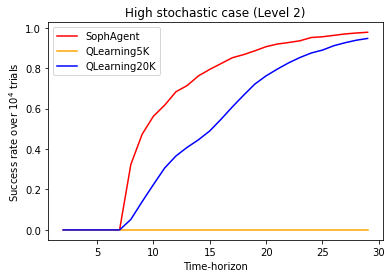

In [9]:
import matplotlib.pyplot as plt
plt.plot(Timehorizon,SuccessRateSI,color='red')
plt.plot(Timehorizon,SuccessRateQ5K,color='orange')
plt.plot(Timehorizon,SuccessRateQ20K,color='blue')
plt.legend(["SophAgent","QLearning5K","QLearning20K"])
plt.title("High stochastic case (Level 2)")
plt.xlabel("Time-horizon")
plt.ylabel("Success rate over $10^4$ trials")
plt.savefig('ResultsLevel-2C.eps',format='eps', dpi=500, bbox_inches='tight')